In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/kirill/Projects/NIR')
import myutils
import sequence_generator as generator
import numpy as np
import matplotlib.pylab as plt
from pomegranate import *
from myutils import frequency_occurrence

{'a': {'len': [2, 2], 'depend_on': False}, 'b': {'len': [2, 4], 'depend_on': False}, 'c': {'len': [0, 2], 'depend_on': False}, 'd': {'len': [1, 3], 'depend_on': 'c'}, 'e': {'len': [1, 3], 'depend_on': True}}


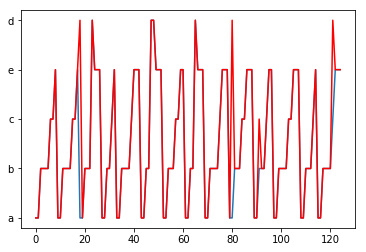

In [2]:
N = 200
sequence = generator.Sequence(N,['a','b','c','d','e'])
sequence.test_discrete()
seq = sequence.sequence
#seq = np.array(sequence.to_int()).reshape(-1,1)
#print(seq.shape)
plt.plot(seq)
anomal = sequence.anormal(0.05)
plt.plot(anomal,'r-')

In [3]:
model = MarkovChain.from_samples([seq])
model.distributions

[{
     "class" :"Distribution",
     "dtype" :"str",
     "name" :"DiscreteDistribution",
     "parameters" :[
         {
             "b" :0.0,
             "c" :0.0,
             "d" :0.0,
             "e" :0.0,
             "a" :1.0
         }
     ],
     "frozen" :false
 }, {
     "class" : "Distribution",
     "name" : "ConditionalProbabilityTable",
     "table" : [
         [
             "b",
             "b",
             "0.6888888888888889"
         ],
         [
             "b",
             "c",
             "0.24444444444444446"
         ],
         [
             "b",
             "d",
             "0.06666666666666667"
         ],
         [
             "b",
             "e",
             "0.0"
         ],
         [
             "b",
             "a",
             "0.0"
         ],
         [
             "c",
             "b",
             "0.0"
         ],
         [
             "c",
             "c",
             "0.3125"
         ],
         [
             "c",

In [4]:
model.log_probability(seq)

-87.85093751078466

In [5]:
model.log_probability(anomal)

-inf

In [6]:
np.linspace(0,0.3,8)

array([0.        , 0.04285714, 0.08571429, 0.12857143, 0.17142857,
       0.21428571, 0.25714286, 0.3       ])

In [7]:
for p in np.linspace(0,0.3,0.05):
    print(p)

/home/kirill/.conda/envs/nir/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35
0.4
0.45000000000000007
0.5
0.55


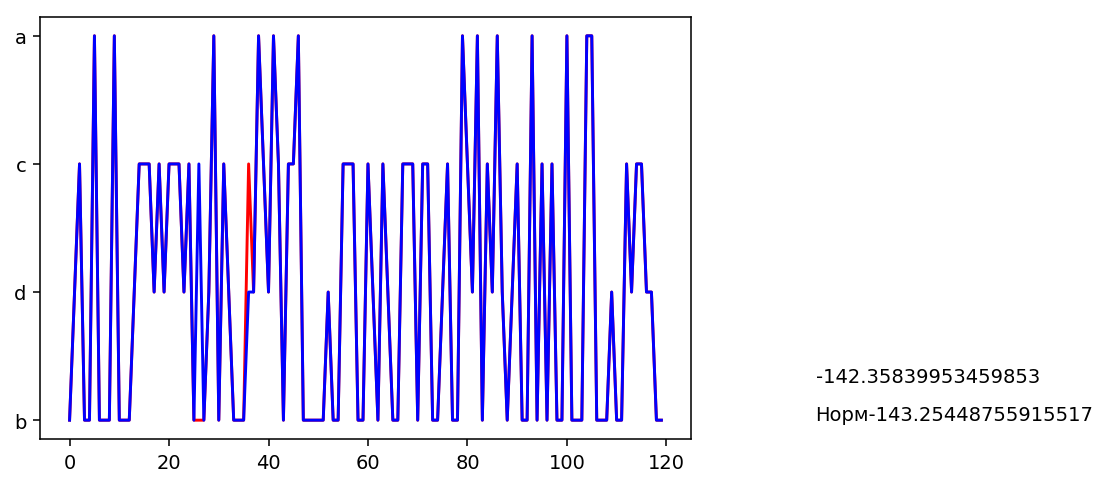

In [10]:
lvl = [0.1 + i*0.05 for i in range(10)]

normal_score = []
anormal_score = []
for p in lvl:
    print(p)
    for i in range(10):
        N = 120
        sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
        seq = sequence.sequence
        #seq = np.array(sequence.to_int()).reshape(-1,1)
        #print(seq.shape)
        s  =  sequence.sequence.copy()
        s[26] = 'c'; s[36] = 'd'
        anomal = s
        
#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
        model = MarkovChain.from_samples([seq]);
        normal_score+=[model.log_probability(seq)]
        anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
        if i == 0 and p ==lvl[3]:
            plt.figure(dpi = 140)
            plt.plot(seq,'r')
            plt.plot(anomal,'b')
            plt.text(150,0,'Норм'+str(normal_score[0]))
            plt.text(150,0.3, anormal_score[0])
            
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

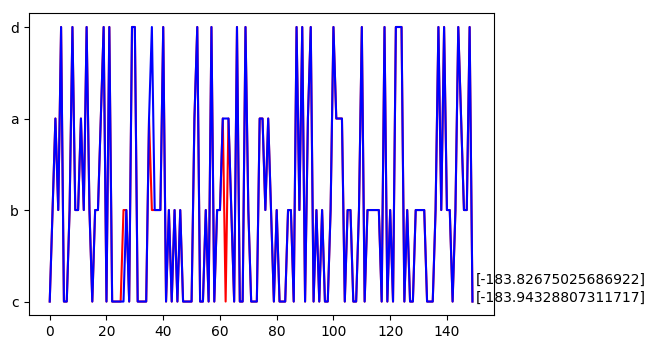

In [11]:
normal_score = []
anormal_score = []

for i in range(100):
    N = 150
    sequence = generator.Sequence(N,['a','b','c','d'],type = 'random',p=[0.1,0.5,0.8])
#         sequence.test_discrete()
    seq = sequence.sequence
    #seq = np.array(sequence.to_int()).reshape(-1,1)
    #print(seq.shape)
    s  =  sequence.sequence.copy()
    s[26] = 'c'; s[36] = 'd'; s[62] = 'd'; s[62] = 'a'
    anomal = s

#         plt.plot(seq,'b')
#         plt.plot(anomal,'r-')
    model = MarkovChain.from_samples([seq]);
    normal_score+=[model.log_probability(seq)]
    anormal_score+=[model.log_probability(anomal)]
#         print(model.log_probability(seq),' ',model.log_probability(anomal))
    if i == 0:
        plt.figure(dpi = 100)
        plt.plot(seq,'r')
        plt.plot(anomal,'b')
        plt.text(150,0,normal_score)
        plt.text(150,0.2, anormal_score)
        
normal_score = np.array(normal_score);
anormal_score = np.array(anormal_score)

In [12]:
np.sum([normal_score > anormal_score])

86

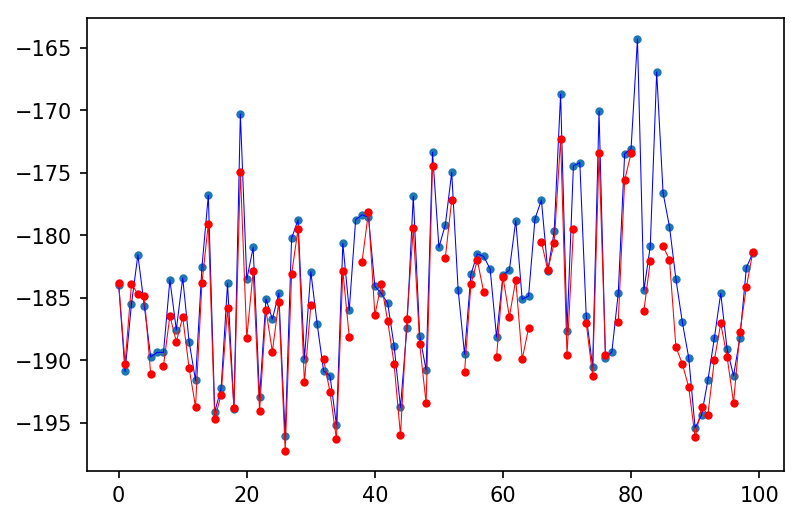

In [13]:
plt.figure(dpi = 150)
plt.plot(normal_score,'.',linewidth = 1,)
plt.plot(normal_score,'b',linewidth = 0.5)

plt.plot(anormal_score,'r.',linewidth = 0.5)
plt.plot(anormal_score,'r',linewidth = 0.5)

In [14]:
q = []
[3]*2
q.append([3]*2)
q.append(['a']*3)
q.insert(1,[1]*4)
q = [1,2,3,4,5]

In [15]:
q[-1]

5

In [16]:
q

[1, 2, 3, 4, 5]

In [17]:
##Сигнал у которого четкие переходы
def experiment_1(N=60,alpha = ['a','b','c','d','e'],p = 0.00):
    params = {'a': {'len': [1, 1], 'depend_on': False},
              'b': {'len': [1, 1], 'depend_on': False},
              'c': {'len': [0, 1], 'depend_on': False},
              'd': {'len': [0, 1], 'depend_on': 'c' },
              'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha)
    sequence.test_discrete(params)
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
    anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq)
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
    return model

{'a': {'len': [1, 1], 'depend_on': False}, 'b': {'len': [1, 1], 'depend_on': False}, 'c': {'len': [0, 1], 'depend_on': False}, 'd': {'len': [0, 1], 'depend_on': 'c'}, 'e': {'len': [1, 3], 'depend_on': 'b'}}
['a', 'b', 'c', 'e', 'e', 'a', 'b', 'd', 'e', 'e', 'a', 'b', 'c', 'e', 'a', 'b', 'a', 'b', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'c', 'e', 'e', 'a', 'b', 'd', 'e', 'e', 'e']
Нормальный -17.927656699860144, Аномальный -inf
[-17.927656699860144]
[-inf]


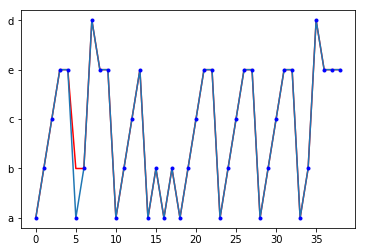

In [18]:
model = experiment_1();

In [19]:
##Сигнал у которого четкие переходы
def experiment_2(N=100,alpha = ['a','b','c','d','e'],p = 0.1):
#     params = {'a': {'len': [1, 1], 'depend_on': False},
#               'b': {'len': [1, 1], 'depend_on': False},
#               'c': {'len': [0, 1], 'depend_on': False},
#               'd': {'len': [0, 1], 'depend_on': 'c' },
#               'e': {'len': [1, 3], 'depend_on': 'b'}}
    sequence = generator.Sequence(N,alpha,type='random',p=[0.05,0.1,0.4,0.8])
    normal_seq = sequence.sequence
    anormal_seq = sequence.anormal(p)
#     anormal_seq[5] = 'b'
    print(normal_seq)
    #model
    model = MarkovChain.from_samples([normal_seq]);
    #model = HiddenMarkovModel.from_samples(DiscreteDistribution,n_components = 4,X=[normal_seq]);

    normal_score = []
    anormal_score = []
    
    normal_score+=[model.log_probability(normal_seq)]
    print(model.distributions[1])
    anormal_score+=[model.log_probability(anormal_seq)]
    print("Нормальный {}, Аномальный {}".format(normal_score[0],anormal_score[0]))
    print(normal_score)
    print(anormal_score)
    plt.plot(anormal_seq,'r')
    
    plt.plot(normal_seq,'b')
    plt.plot(normal_seq,'b.')
    plt.savefig('Дискретный с невозможным переходом.png',dpi = 150)
    #print(model.to_json())
    
    with open('experiment1.txt','w') as file:
        table = myutils.table_from_MarkovChain(model)
        for t in table:
            file.write(str(t)+'\n')
#     print(model.distributions[1])
    return model

['c', 'd', 'c', 'd', 'd', 'c', 'd', 'c', 'c', 'e', 'd', 'e', 'd', 'b', 'd', 'e', 'd', 'd', 'c', 'd', 'c', 'e', 'd', 'e', 'd', 'e', 'd', 'e', 'd', 'd', 'b', 'c', 'd', 'd', 'e', 'c', 'e', 'd', 'a', 'c', 'b', 'e', 'd', 'd', 'e', 'e', 'd', 'e', 'd', 'b', 'e', 'd', 'e', 'c', 'c', 'c', 'e', 'c', 'e', 'e', 'c', 'c', 'd', 'd', 'd', 'c', 'd', 'd', 'd', 'e', 'e', 'd', 'c', 'e', 'd', 'd', 'd', 'd', 'c', 'c', 'd', 'e', 'c', 'e', 'c', 'c', 'd', 'd', 'd', 'd', 'd', 'c', 'c', 'c', 'c', 'e', 'a', 'e', 'e', 'c']
b	b	0.0
b	c	0.25
b	d	0.25
b	e	0.5
b	a	0.0
c	b	0.037037037037037035
c	c	0.3333333333333333
c	d	0.3333333333333333
c	e	0.2962962962962963
c	a	0.0
d	b	0.075
d	c	0.225
d	d	0.4
d	e	0.275
d	a	0.025
e	b	0.0
e	c	0.2692307692307693
e	d	0.5384615384615384
e	e	0.15384615384615385
e	a	0.03846153846153846
a	b	0.0
a	c	0.5
a	d	0.0
a	e	0.5
a	a	0.0
Нормальный -120.69040953309252, Аномальный -inf
[-120.69040953309252]
[-inf]


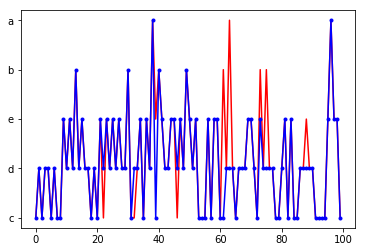

In [20]:
experiment_2()

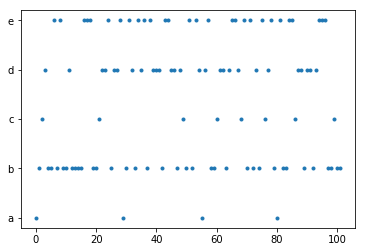

In [21]:
sequence = generator.Sequence(102,['a','b','c','d','e'],type='random',p=[0.05,0.1,0.4,0.8])
s = sequence.sequence
plt.yticks(range(7),['a','b','c','d','e'])
plt.plot(s,'.')

In [153]:
def rename_state(x):
    a = 's'+x
    return a
def experiment_3(s,n_components):
    #s = generator.Signal(5000,4,[10,10,10,12],[0.5,2,4,2],[50,100])
    seq = s.sequence
    print(seq[:10])
    v = int(len(seq)*0.8)
    x_train, x_test = seq[0:v], seq[v:]
    path_train = s.path[0:v]
    path_source = s.path[v:]
    
    labels = list(map(rename_state,list(map(str,path_train))))
    print(len(labels))
    model = HiddenMarkovModel.from_samples(NormalDistribution, n_components = n_components,X = [x_train],
                                           labels=[labels],algorithm='labeled' )
    p = model.viterbi(x_test)
    path_test = []
    for i in p[1]:
        path_test +=[i[0]]
    path_test = path_test[1:]
    
    
    print('Длина пути для теста: soure={}, test={}'.format(len(path_source), len(path_test)))
    
    path_source = np.array(path_source)
    path_test = np.array(path_test)
    path_train = np.array(path_train)
    fig,ax = plt.subplots(3,1,dpi=140)
    ax[0].plot(x_train)
    ax[0].plot(path_train*3,'g',lw=0.9)
    
    p = model.viterbi(x_train)
    path_s = []
    
    for i in p[1]:
        path_s +=[i[0]]
    path_s = path_s[1:]
    path_s = np.array(path_s)
    ax[0].plot(path_s*3,'r')
    
    ax[2].hist(x_train,bins = int(np.log(len(x_train))+30));
    
    ax[1].plot(x_test)
    ax[1].plot(path_source*3,'g')
    ax[1].plot(path_test*3,'r--')
    plt.tight_layout()
    print(np.mean(seq))
    print(model)
    
    #--------
    signal = np.array(seq)
    return model

In [112]:
#numpy.random.seed(0)

In [185]:
signal = generator.Signal(5000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
print(signal.sequence[:5])

[9.887197242902893, 10.075621989688267, 10.569242509661317, 10.488842741728705, 10.012605995746698]


[9.887197242902893, 10.075621989688267, 10.569242509661317, 10.488842741728705, 10.012605995746698, 10.567537804977425, 10.26144975821205, 9.978130279096424, 10.137839059570828, 10.69590125964194]
4000
Длина пути для теста: soure=1000, test=1000
11.273665899127321
None:{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            9.99880571456098,
            0.6636459921790573
        ],
        "frozen" : false
    },
    "name" : "s0",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
            13.893578764805214,
            2.062915388914143
        ],
        "frozen" : false
    },
    "name" : "s1",
    "weight" : 1.0
}{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "NormalDistribution",
        "parameters" : [
     

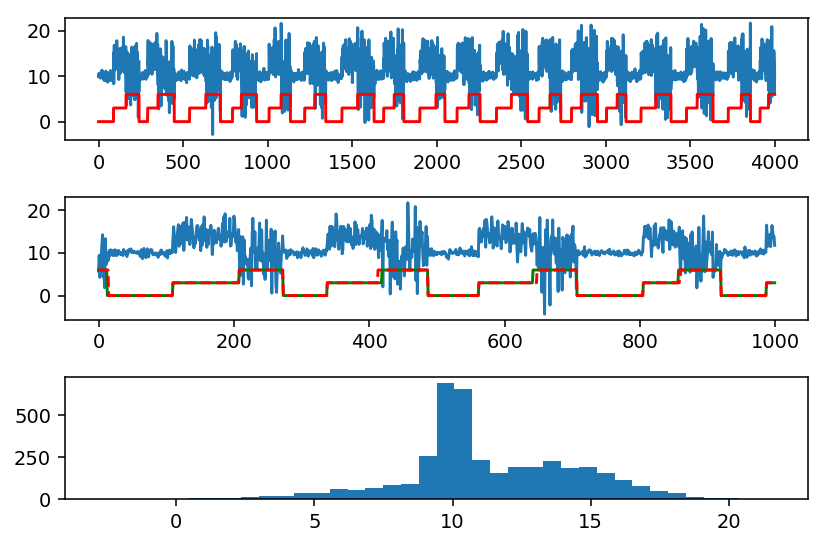

In [186]:
model = experiment_3(signal,3)

In [201]:
for i in model.viterbi(signal)[1]:
    print(i)
    break

(3, {
    "class" : "State",
    "distribution" : null,
    "name" : "None-start",
    "weight" : 1.0
})


In [544]:
s = generator.Signal(1000,3,[10,14,10,12],[0.5,2,4,2],[50,100])
signal=s.sequence
y_test = s.path

In [545]:
log, path = model.viterbi(signal)
path =[ state.name for i, state in model.viterbi(signal)[1]]

In [546]:
x = model.viterbi(signal)

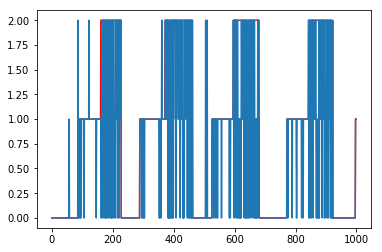

In [547]:
y_pred = []
for x in signal:
    y_pred.append(model.viterbi([x])[1][1][0])
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred)

In [359]:
a = model.viterbi(signal[0:10])[1]
for i in a:
    print(i[0])
s = [x[0] for x in model.viterbi(signal[0:10])[1]][1:]
s

3
0
0
0
0
0
0
0
0
0
0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
y_pred = []
S = 50 

for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

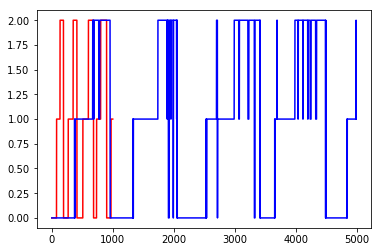

In [370]:
y_pred = []
step = 5
for i in range(len(signal)):
    #print(signal[i:i+step])
#     print(model.viterbi(signal[i:i+step])[1])
    a = [s[0] for s in model.viterbi(signal[i:i+step])[1] ][1:]
    
#     y_pred.append(model.viterbi([signal[i:i+step]])[1][1][0])
    y_pred = y_pred + a
    #y_test.append(model.viterbi([x])[1][1]['name'])
#plt.plot(y_pred)
plt.plot(y_test,'r')
plt.plot(y_pred,'b')
#y_pred

In [549]:
y_pred = predict(model,signal,windows_size = 60,step = 10)

1000
Количество окон  100.0


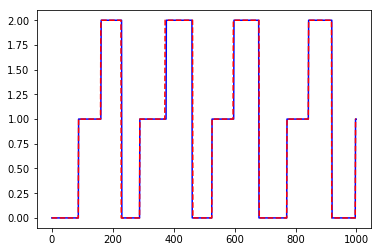

In [552]:
plt.plot(y_pred,'b')
plt.plot(y_test,'r--')

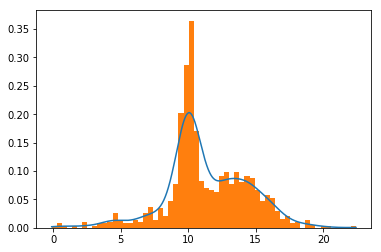

In [419]:
from scipy import stats

space = np.linspace(min(signal),max(signal),1000)
ker  = stats.gaussian_kde(signal)
plt.plot(space,ker(space))
#plt.plot(np.mean(signal),)
plt.hist(signal,60,normed=True);

In [527]:
a = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,15,15,241]
#a = [0]*28


def predict(model,y_test,windows_size = 4, step = 3):
    y_pred = []
    print(len(y_test))
    print('Количество окон ',len(y_test)/step)
    for i in range(int(len(y_test)/step)):
        t = y_test[i*step:windows_size+i*step]
#         print(t)
        path = model.viterbi(t)[1]
        x = [y[0] for y in path][1:]
        if i == 0:
            y_pred = y_pred + x
        else:
            y_pred = y_pred + x[windows_size-step:]
#         print(x)
#         print('y_pred',y_pred)
#         print(t[windows_size-step:])
#     print(x)
    return y_pred

In [520]:
y = predict(model,a)

27
Количество окон  9.0
[1, 2, 3, 4]
y_pred [2, 2, 2, 2]
[2, 3, 4]
[4, 5, 6, 7]
y_pred [2, 2, 2, 2, 2, 2, 2]
[5, 6, 7]
[7, 8, 9, 10]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[8, 9, 10]
[10, 11, 12, 13]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[11, 12, 13]
[13, 14, 15, 16]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]
[14, 15, 16]
[16, 17, 18, 19]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1]
[17, 18, 19]
[19, 20, 21, 22]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2]
[20, 21, 22]
[22, 23, 24, 15]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
[23, 24, 15]
[15, 15, 241]
y_pred [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2]
[15, 241]
[2, 2, 2]


In [521]:
len(y)

27

In [522]:
y

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]